# 1 - Notacion cientifica en la Computadora (5000 créditos)
- a) 4500000 con 4 caracteres: 45e5
- b) -1230000 con 6 caracteres: -123e4
- c) 0.000000123 con 6 caracteres: 123e-9
- d) 1 con 4 caracteres: 1e00
 

# 2 - No confies en los calculos de las computadoras (10000 créditos)
* a)
    - a) 0.4 * 6 > 0.24           True
    - b) 0.8 * 3 == 0.3 * 8       False
    - c) 0.3 * 3 == 0.9           False
    - d) 3.1 * 2 < 6.2            False
    - e) 1e100 + 1e50 == 1e100    True

* b)
    1e100 + 10**n > 1e100 para N = 84        

In [1]:
i = 1
while not (1e100+10**i > 1e100):
    i+=1
print(i)


84


In [2]:
# c)

# tomando 0.0000001 como incremento...

i = 83.0

while not (1e100+10**i > 1e100):
    i+=0.0000001
print(i)


83.98736884138171


# 3 - Python! (10000 créditos)

In [3]:
from scipy.special import gamma

# a)
def factorial_recursivo(num:int):
    if num == 1:
        return num
    else:
        return num * factorial_iterativo(num-1)

# b)
def factorial_iterativo(num:int):
    sol = 1
    while num > 1:
        sol *= num
        num -= 1
    return sol

# c)
def factorial_gamma(num:int):
    return int(gamma(num+1))

print(factorial_iterativo(6))
print(factorial_recursivo(6))
print(factorial_gamma(6))

720
720
720


# 4 - Análisis Matemático en Python (20000 créditos)

In [4]:
# a)
def aprox_derivada(f, x:float, h:float):
    return (f(x+h)-f(x))/h

# b)
f = lambda x : x**2

print(aprox_derivada(f, 1, 0.01))
print(aprox_derivada(f, 1, 0.0001))
print(aprox_derivada(f, 1, 0.000001))
print(aprox_derivada(f, 1, 0.000000001))
print(aprox_derivada(f, 1, 0.000000000001))


2.0100000000000007
2.000099999999172
2.0000009999243673
2.000000165480742
2.000177801164682


- c)
    * pregunta secreta: (sabemos q la derivada de f(1) es 2) tomando el valor de h que haga que abs(aprox_derivada(f,1,h) - 2) sea minimo

In [5]:
h = 0.1
last = abs(aprox_derivada(f,1,h)-2)

# tomando 0.0000001 como minimo incremento...

while True:
    h -= 0.0000001
    current = abs(aprox_derivada(f,1,h)-2)
    if current > last:
        h += 0.0000001
        break
    last = current
print(h)


9.999815438175232e-08


# 5 - Primera introducción a la Serie da Taylor (20000 créditos)

- a) Aproximacion por Serie de Taylor
- b) $ \sum_{n=0}^{\infty}\frac{f^{n}(a)}{n!}(x-a)^{n} $
- c) Calcule el desarrollo en serie de (Taylor) de las siguientes Funciones:
    - $ f(x) = e^{x} $
       $$ f(x) = e^{(x-a)} + \frac{\frac{d(e^{x})}{dx}(x-a)}{1!} + \frac{\frac{d^{2}(e^{x})}{d^{2}x}(x-a)^{2}}{2!} + \frac{\frac{d^{3}(e^{x})}{d^{3}x}(x-a)^3}{3!} + ... $$
       $$ f(x) = e^{(x-a)} + e^{(x-a)} + \frac{e^{(x-a)^{2}}}{2} + \frac{e^{(x-a)^{3}}}{6} + ...$$
    
    - $ f(x) = \sin(x) $
        $$ f(x) = \sin{(x-a)} + \frac{\frac{d\sin{x}}{dx}(x-a)}{1!} + \frac{\frac{d^{2}\sin{x}}{d^{2}x}(x-a)^{2}}{2!} + \frac{\frac{d^{3}\sin{x}}{d^{3}x}(x-a)^{3}}{3!} + ... $$
        $$ f(x) = \sin{(x-a)} + \cos{(x-a)} + \frac{-\sin{(x-a)^{2}}}{2} + \frac{-\cos{(x-a)^{3}}}{6} + ... $$
    
    - $ f(x) = x^{5}+6x^{3}-4x^{2}+5 $
        $$ f(x) =  5(x-a)^{5} + 6(x-a)^{3} + 4(x-a)^{2}+ 5 + \frac{5(x-a)^{4}+18(x-a)^{2}+x(x-a)}{1} + \frac{20(x-a)^{6}+36(x-a)^{2}+8}{2} + \frac{60(x-a)^{6}+36}{6} + ... $$

# 6 - ¿Has visto las series de Taylor? (20000 créditos)

In [6]:
import sympy as sy
import numpy as np
from sympy.functions import sin,cos
import matplotlib.pyplot as plt
import math

plt.style.use('ggplot')
sy.init_printing()

In [7]:
def taylor(function,  x_0, n):
    i = 0
    p = 0
    
    while i <= n:
        p = p + (function.diff(x,i).subs(x,x_0)/factorial_iterativo(i))*(x-x_0)**i
        i += 1
    return p

In [8]:
def plot(n:int):
    x_lims = [-10,10]
    x1 = np.linspace(x_lims[0], x_lims[1], 800)
    y1 = []
    y2 = []
    
    for j in range(1,n+1):
        if j == n or j % 2 == 0: 
            func = taylor(f,0,j)
            for k in x1:
                y1.append(func.subs(x,k))
            plt.plot(x1,y1,label=(f'Orden {str(j)}:'))
            y1 = []
    for k in x1:
        y2.append(f.subs(x,k))
        
    plt.plot(x1,y2,label='Funcion Original')
    plt.xlim(x_lims)
    plt.ylim([-5,5])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.title('Aproximación por serie de Taylor')
    plt.show()

 x
e 
Poliniomio de Taylor de orden 10
 10    10       9    9       8    8       7    7       6    6       5    5    
x  ⋅log  (e)   x ⋅log (e)   x ⋅log (e)   x ⋅log (e)   x ⋅log (e)   x ⋅log (e) 
──────────── + ────────── + ────────── + ────────── + ────────── + ────────── 
  3628800        362880       40320         5040         720          120     

   4    4       3    3       2    2                  
  x ⋅log (e)   x ⋅log (e)   x ⋅log (e)               
+ ────────── + ────────── + ────────── + x⋅log(e) + 1
      24           6            2                    


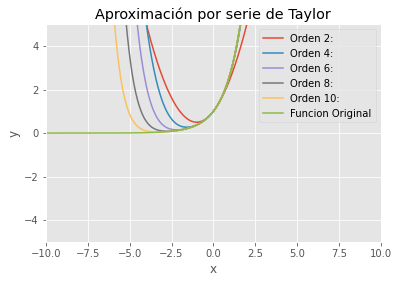

In [9]:
e = sy.Symbol('e')
x = sy.Symbol('x')
f = e**x
n = 10

sy.pprint(f)
func = taylor(f,0,n)
print(f'Poliniomio de Taylor de orden {n}')
sy.pprint(func)

f = f.subs(e, math.e)

plot(n)

sin(x)
Poliniomio de Taylor de orden 10
   9       7      5    3    
  x       x      x    x     
────── - ──── + ─── - ── + x
362880   5040   120   6     


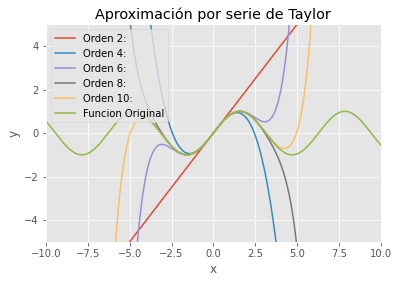

In [10]:
x = sy.Symbol('x')
f = sin(x)
n = 10

sy.pprint(f)
func = taylor(f,0,n)
print(f'Poliniomio de Taylor de orden {n}')
sy.pprint(func)

plot(n)

 5      3      2    
x  + 6⋅x  + 4⋅x  + 5
Poliniomio de Taylor de orden 10
 5      3      2    
x  + 6⋅x  + 4⋅x  + 5


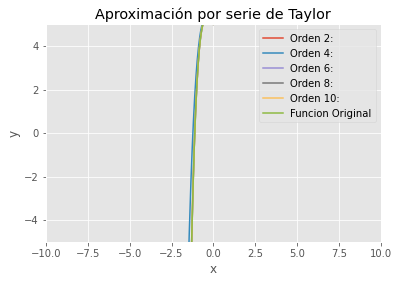

In [11]:
x = sy.Symbol('x')
f = x**5+6*x**3+4*x**2+5
n = 10

sy.pprint(f)
func = taylor(f,0,n)
print(f'Poliniomio de Taylor de orden {n}')
sy.pprint(func)

plot(n)

# 7 - En esta asignatura el tamaño sı́ importa. (30000 créditos)
- Pregunta Secreta:
    $ O(h) $ y $ O(h^{2}) $ son los errores de resto o truncacion de cada una de las aproximaciones y su expresion exacta es:
    $$ $$
    

# 8  Lo que tus profesores de Álgebra no querı́an que supieras(30000 créditos)

In [12]:
# a)
def check_matrix_multiplication(m1,m2,m3):
    return np.equal(m1@m2, m3).all()
     

In [13]:
m1 = np.array([[1,0,0], [0,1,0], [0,0,1]])
m2 = np.array([[2,3,4], [1,2,3], [4,5,6]])
m3 = np.array([[2,3,4], [1,2,3], [4,5,6]])

check_matrix_multiplication(m1,m2,m3)

True

In [14]:
# b)
def check_solution(A,x,b):
    return check_matrix_multiplication(A,x,b)

In [15]:
# A = np.array([[2,3], [3,4]])
# x = np.array([4,-3])
# b = np.array([-1,0])

A = np.array([[3,2], [4,-3]])
x = np.array([1,2])
b = np.array([7,-2])

check_solution(A,x,b)

True

# 9 Cuando a la computadora no le gusta tu álgebra (30000 créditos)

# 10 -  No hagas caso a los rumores (a no ser que sean ciertos :-/) (45000 créditos)
<b>a)</b>

<b>b)</b>

<b>c)</b>

# 11 - Cónicas (50000 créditos)
### La función recibe una cónica tanto en su forma estndar como en su forma general escrita como una expresión válida en python, ambas 

In [32]:
import matplotlib as mpl

mpl.rcParams['lines.color'] = 'k'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler('color', ['b'])
    
x = np.linspace(-9,9,400)    
y = np.linspace(-5,5,400)
x,y = np.meshgrid(x,y)

def axes():
    plt.axhline(0,alpha=.1)    
    plt.axvline(0,alpha=.1)

def plot_conic(f):
    axes()
    plt.contour(x,y,f,[1], colors='b')
    plt.show()

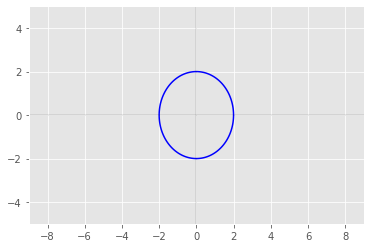

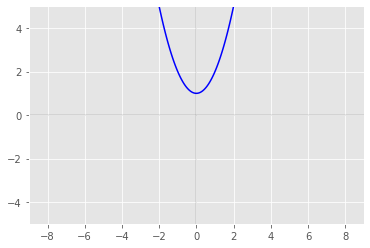

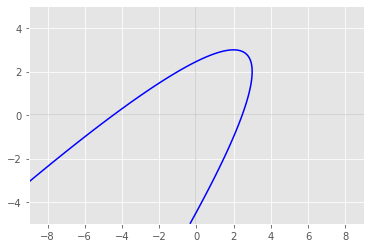

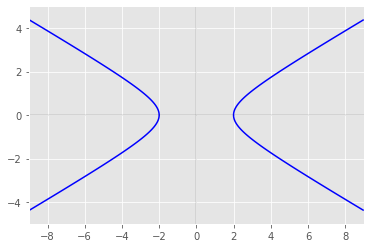

In [33]:
plot_conic(x**2/2**2+y**2/2**2)
plot_conic(y-x**2)
plot_conic(1*x**2+-2*x*y+y**2+2*x+2*y-10)
plot_conic(x**2/2**2 - y**2/1**2)

# 12 - Este ejercicio es mucho más difı́cil de lo que parece. (80000 créditos)
Como 1e83 y 1e100 tienen una diferencia de exponentes tan grande (17), mas concretamente, un float de 64 bits de python tiene 16 digitos de precisión, por tanto, no es posible sumer los dos numeros sin que ocurran una cancelacion catastrófica, como vemos en los ejemplos debajo, si lo sumamos de manera normal no va a afectar la suma, si sumamos los 1e83 por separado, estos se convertiran en 1e84 que al sumarlo con 1e100 da un resultado distinto de 1e100 pero que sigue siendo incorrecto 

In [18]:
def weird_sum(list:list):
    temp = {}
    for i in list:
        if not i in temp:
            temp[i] = i
        else:
            temp[i] += i
    res = 0
    for i in temp:
        res += temp[i]
    return res

list = [1e100, 1e83, 1e83, 1e83, 1e83, 1e83, 1e83, 1e83, 1e83, 1e83, 1e83]

suma = 0

for i in list:
    suma += i

print(suma)
print(weird_sum(list))

1e+100
1.0000000000000002e+100


# 13 -  ¿Dinosaurios? :-/ (30000 créditos)
El dinosaurio, de Augusto Monterroso es considerado el relato mas corto escrito en espaǹol, o por lo menos lo fue hasta principios del siglo 21, cuando son publicadas 'El emigrante', 'Luis XIV' y 'Epitafio para un microrrelatista', pero bueno, ya estos vinieron a copiar al original asi que... no son tan relevantes ;-)

- pregunta secreta:
    la pregunta debe estar relacionada con que el profe dijo en la conferencia que debı́amos ignorarlo y ponernos a probar cosas en la pc, que ellos, como el dinosaurio... estarı́an ahı́... lo q no aclararon si ese ahı́ es en el curso próximo repitiendo la asigantura 
